### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from geopy.geocoders import Nominatim
import folium

In [2]:
dataset = pd.read_csv('training.csv')
display(dataset)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,8378,57,2,3,3,1,2,2,0,1,...,-1,1,4,-5.811335,35.098103,0,1,0,0,1
7090,881,32,1,1,6,3,1,1,0,1,...,-1,1,1,-2.635156,32.945423,1,1,0,0,3
7091,6672,22,2,3,3,3,2,2,0,1,...,-1,4,4,-8.303729,31.059642,0,0,0,0,0
7092,5416,28,2,1,3,1,2,2,0,1,...,-1,1,4,-8.090712,35.836560,1,0,0,1,3


In [3]:
# Renaming columns for clarity and better understanding 

dataset.rename(columns={'Q1': 'Age', 
               'Q2': 'Gender', 'Q3' :'Marital status',
               'Q4': 'Level of Education', 'Q5':'Single response',
               'Q6':'Land owner', 'Q7':'Own a mobile phone?', 'Q8_1':'Salaries/wages', 'Q8_2':'Money from trading/selling' ,'Q8_3':'Money from providing a services' , 
               'Q8_4': 'Occasional jobs' , 'Q8_5': 'Rental income', 'Q8_6': 'Interest from savings, investments' ,'Q8_7':'Pension' , 'Q8_8':'Social welfare', 
               'Q8_9':'Rely on someone else','Q8_10':'Independent', 'Q8_11':'Other', 'Q9':'Source of income',
               'Q10':'Traders', 'Q11':'Service Providers','Q12':'Sent money to some with country', 'Q13':'When did you last send money?','Q14':'Received money from someone','Q15':'When did you last receive money?',
               'Q16':'Use mobile money for purchases','Q17':'Use mobile money for paying your bills?','Q18':'Literacy in Kiswhahili',
               'Q19':'Literacy in English'},inplace=True)

dataset.head()

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,Use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [4]:
dataset.shape

(7094, 37)

- The dataset has 7094 rows and 37 Columns

#### Examining the dataset.

- Examining our dataset for any missing , duplicated values and also getting a better understanidng of the dataset.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       7094 non-null   int64  
 1   Age                                      7094 non-null   int64  
 2   Gender                                   7094 non-null   int64  
 3   Marital status                           7094 non-null   int64  
 4   Level of Education                       7094 non-null   int64  
 5   Single response                          7094 non-null   int64  
 6   Land owner                               7094 non-null   int64  
 7   Own a mobile phone?                      7094 non-null   int64  
 8   Salaries/wages                           7094 non-null   int64  
 9   Money from trading/selling               7094 non-null   int64  
 10  Money from providing a services          7094 no

In [6]:
# - Checking for missing values 
dataset.isnull().sum().sum()

0

In [7]:
# - Checking for any duplicates

dataset.duplicated().sum()

0

- The dataset doesn't have any duplicates and null values 


### Dataset basic discription

In [8]:
dataset.describe()

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,Use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


- The maximum of people who were interviewed is 7094

- The minimum age is 16 and the maximum is 100

## Visualisation

- The dataset mostly consist of categorical data and Such pit needs to be transformed in order to get the most information from it before we can visualise it and answer the question.

In [9]:
Male = dataset[(dataset['Gender'] == 1)]
Female = dataset[(dataset['Gender'] == 2)]

In [10]:
dataset['Gender'].value_counts()

2    3972
1    3122
Name: Gender, dtype: int64

- The male count is 3122 and Female count 3972 making a total of 7094

In [11]:
# - Gender
sex = {'Gender':{1:'Male',2:'Female'}}
dataset.replace(sex, inplace=True)

# - Marital status
Status = {'Marital status':{1:'Married',2:'Divorced',3:'Widowed',4:'Single'}}
dataset.replace(Status, inplace=True)

# - Highest level of education completed?
education = {'Level of Education':{1:'No formal education',2:'Some primary',3:'Primary completed',
                                   4:'Post primary technical training',5:'Some secondary',6:'University or other higher education',7:'Don’t know'}}
dataset.replace(education, inplace=True)

# - Single response?
Single_response = {'Single response':{1:'You personally own the land/plot where you live',2:'You own the land/plot together with someone else',3:'A household member owns the land/plot',
                                   4:'The land/plot is rented',5:'You don’t own or rent the land',6:'Don’t know'}}
dataset.replace(Single_response, inplace=True)

# - Do you personally own land

land = {'Land owner':{1:'Yes',2:'No'}}
dataset.replace(land, inplace=True)

# - Do you personally own a mobile phone?
mobile_phone = {'Own a mobile phone?':{1:'Yes',2:'No'}}
dataset.replace(mobile_phone,inplace=True)

# - Salary/Wages

Salary = {'Salaries/wages':{1:'Yes',0:'No'}}
dataset.replace(Salary, inplace=True)

# - Money from trading/selling Anything you produce/grow/raise/make/collect with the intention of selling

Trading = {'Money from trading/selling':{1:'Yes',0:'No'}}
dataset.replace(Trading, inplace=True)

# - Money from providing a services

Service = {'Money from providing a services':{1:'Yes',0:'No'}}
dataset.replace(Service, inplace=True)

# - Occasional jobs

jobs = {'Occasional jobs':{1:'Yes',0:'No'}}
dataset.replace(jobs, inplace=True)

# - Rental income

rent = {'Rental income':{1:'Yes',0:'No'}}
dataset.replace(rent, inplace=True)

# - Interest from savings

savings = {'Interest from savings':{1:'Yes',0:'No'}}
dataset.replace(savings, inplace=True)

# - investments

investments = {'investments':{1:'Yes',0:'No'}}
dataset.replace(investments, inplace=True)

# - Pension

Pension = {'Pension':{1:'Yes',0:'No'}}
dataset.replace(Pension, inplace=True)

# - Social welfare

Social_welfare = {'Social welfare':{1:'Yes',0:'No'}}
dataset.replace(Social_welfare, inplace=True)

# - Rely on someone else

dependent = {'Rely on someone else':{1:'Yes',0:'No'}}
dataset.replace(dependent, inplace=True)

# - Independent

Independent = {'Independent':{1:'Yes',0:'No'}}
dataset.replace(Independent, inplace=True)

# - Other

Other = {'Other':{1:'Yes',0:'No'}}
dataset.replace(Other, inplace=True)

# - 'Source of income'
income = {'Source of income':{-1:'not applicable',1:'Government',2:'Private company/business',3:'Individual who owns his own business',
                                   4:'Small scale farmer',5:'Commercial farmer',6:'Work for individual/household e.g. security guard, maid etc.',7:'Other'}}
dataset.replace(income, inplace=True)

# - 'Traders'

Traders = {'Traders':{-1:'not applicable',1:'Crops/produce I grow',2:'Products I get from livestock',3:'Livestock',
                                   4:'Fish you catch yourself/aquaculture',5:'Things you buy from others – agricultural products',
                              6:'Things you buy from others – non-agricultural products',7:'Things you make (clothes, art, crafts)',
                             8:'Things you collect from nature (stones, sand, thatch, herbs)',9:'Things you process (honey, dairy products, flour)',10:'Other'}}
dataset.replace(Traders, inplace=True)


# - 'Service Providers'

Service_Providers = {'Service Providers':{-1:'not applicable',1:'Personal services (hairdressers, massage, etc.)',2:'PTelecommunications/IT',3:'Financial services',
                                   4:'Transport',5:'Hospitality – Accommodation, restaurants, etc.',
                              6:'Information/research',7:'Technical – mechanic, etc.',
                             8:'Educational/child care',9:'Health services – traditional healer etc.',10:'Legal services',11:'Security',12:'Other,specify'}}
dataset.replace(Service_Providers, inplace=True)

# - Independent

money_OTC = {'Sent money to some with country':{1:'Yes',0:'No'}}
dataset.replace(money_OTC, inplace=True)

# - When did you last send money?
last_received = {'When did you last send money?':{-1:'not applicable',1:'Yesterday/today',2:' In the past 7 days',3:'In the past 30 days',
                                   4:'In the past 90 days',5:'More than 90 days ago but less than 6 months ago',6:'6 months or longer ago'}}
dataset.replace(last_received, inplace=True)


# - received money from someone
last_received = {'received money from someone':{-1:'not applicable',1:'Yesterday/today',2:' In the past 7 days',3:'In the past 30 days',
                                   4:'In the past 90 days',5:'More than 90 days ago but less than 6 months ago',6:'6 months or longer ago'}}
dataset.replace(last_received, inplace=True)

# - Use mobile money for purchases
Purchase = {'Use mobile money for purchases':{-1:'not applicable',1:'Never',2:'Daily',3:'Weekly',
                                   4:'Monthly',5:'Less often than monthly'}}
dataset.replace(Purchase, inplace=True)

# - use mobile money for paying your bills?
Bills = {'Use mobile money for paying your bills?':{-1:'not applicable',1:'Never',2:'Daily',3:'Weekly',
                                   4:'Monthly',5:'Less often than monthly'}}
dataset.replace(Bills, inplace=True)

# - Literacy in Kiswhahili
Literacy = {'Literacy in Kiswhahili':{1:'Can read and write',2:'Can read only',3:'Can write only',
                                   4:'Can neither read nor write',5:'Refused to read'}}
dataset.replace(Literacy, inplace=True)

# - Literacy in English
English = {'Literacy in English':{1:'Can read and write',2:'Can read only',3:'Can write only',
                                   4:'Can neither read nor write',5:'Refused to read'}}
dataset.replace(English, inplace=True)

# - mobile_money

mobile_money = {'mobile_money':{1:'Yes',0:'No'}}
dataset.replace(mobile_money, inplace=True)

# - savings

savings = {'savings':{1:'Yes',0:'No'}}
dataset.replace(savings, inplace=True)

# - borrowing

borrowing = {'borrowing':{1:'Yes',0:'No'}}
dataset.replace(borrowing, inplace=True)

# - insurance

insurance = {'insurance':{1:'Yes',0:'No'}}
dataset.replace(insurance, inplace=True)

# - mobile_money_classification
cleanup_nums = {'mobile_money_classification':{0:'No_financial_services',1:'Other_only',
                2:'Mm_only',3:'Mm_plus'}}
dataset.replace(cleanup_nums, inplace=True)


In [12]:
dataset.head(1)

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,Use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,Female,Widowed,No formal education,You personally own the land/plot where you live,No,No,No,No,...,not applicable,Can neither read nor write,Can neither read nor write,-4.460442,29.811396,No,No,No,No,No_financial_services


### Financial services accessed Vs Age

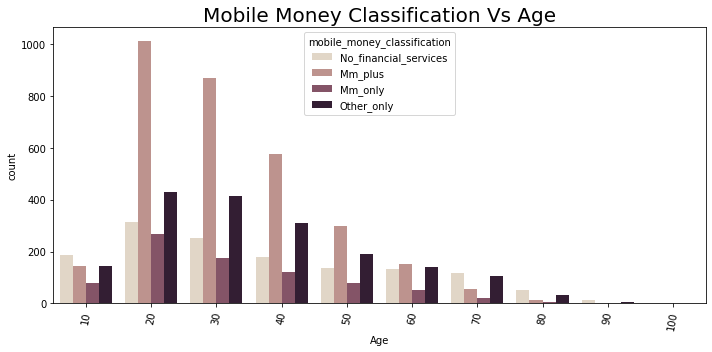

In [13]:
plt.figure(figsize = (10, 5))
dataset['Age'] = dataset.Age.apply(lambda x : int(x/10) * 10)
plt.title('Mobile Money Classification Vs Age', fontsize = 20)
plt.xticks( rotation = 80)
sns.countplot(x = 'Age', hue = 'mobile_money_classification', palette="ch:.25", data = dataset)
plt.tight_layout()
plt.show()

With the age comparison it seems that as people mature in age they tend to stop using mobile money and they opt to use other financial service

### financial services accessed Vs Gender

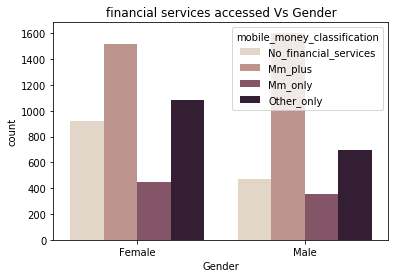

In [14]:
plt.title('financial services accessed Vs Gender')
sns.countplot(dataset['Gender'], hue=dataset['mobile_money_classification'],palette="ch:.25")  
plt.show()

- Both gender's have a higher count in the use of mobile money and also use at least one of the other financial services, with the count of mobile money only almost having the same count.

### financial services accessed Vs Marital Status

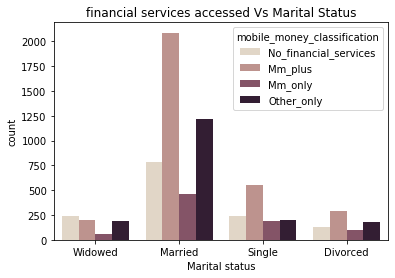

In [15]:
plt.title('financial services accessed Vs Marital Status')
sns.countplot(dataset['Marital status'] , hue=dataset['mobile_money_classification'],palette="ch:.25")  
plt.show()  


- The Widowed and Divorced graph are almost relatively the same, maybe that could be tied to the financial impact that comes with either the loss or separation from a spouse. If we look at the Married plot we can see that there is a high count of usage of fincancial and other service and that could be an indication of Married couples hae a better advantage when it comes to finances and asserts they possess.

- The same could be said about the Single's plot, there's not much of finacial usage of financial services.

#### Financial Services accessed vs land ownership

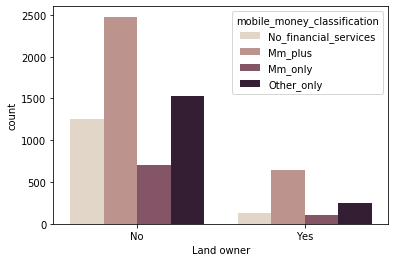

In [16]:
sns.countplot(dataset['Land owner'] , hue=dataset['mobile_money_classification'],palette="ch:.25") 
plt.show()  

- Land owners don't use mobile money or other financial services as much as those that own Land. The count is higher in all the bars in those that don't own land.

### Financial services accessed vs Source of income 

In [17]:
x = dataset.filter(['Salaries/wages','Source of income','Rental income','Pension','mobile_money_classification'])
x

,Salaries/wages,Source of income,Rental income,Pension,mobile_money_classification
0,No,not applicable,No,No,No_financial_services
1,Yes,Government,No,No,Mm_plus
2,No,not applicable,No,No,Mm_only
3,No,not applicable,No,No,Mm_plus
4,No,not applicable,No,No,Mm_plus
...,...,...,...,...,...
7089,No,not applicable,No,No,Other_only
7090,No,not applicable,No,No,Mm_plus
7091,No,not applicable,No,No,No_financial_services
7092,No,not applicable,No,No,Mm_plus


In [18]:
income = x.loc[x['Salaries/wages'] == 'Yes']
income

,Salaries/wages,Source of income,Rental income,Pension,mobile_money_classification
1,Yes,Government,No,No,Mm_plus
27,Yes,Individual who owns his own business,No,No,Mm_plus
45,Yes,Work for individual/household e.g. security gu...,No,No,Mm_only
47,Yes,Private company/business,No,No,Mm_plus
62,Yes,Government,No,No,Mm_plus
...,...,...,...,...,...
7017,Yes,Private company/business,No,No,Mm_plus
7023,Yes,Government,No,No,Mm_plus
7044,Yes,Government,No,No,Mm_plus
7076,Yes,Government,No,No,Mm_plus


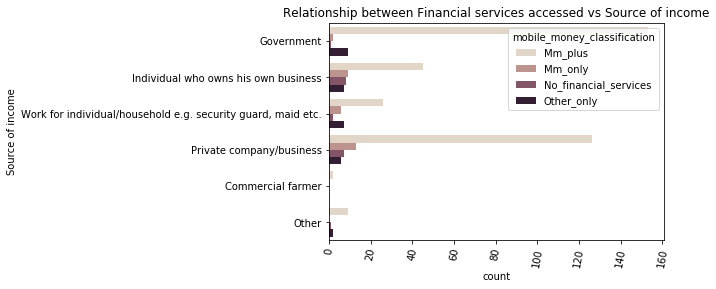

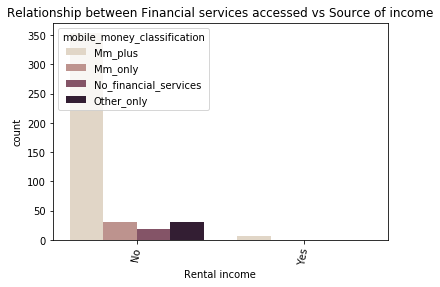

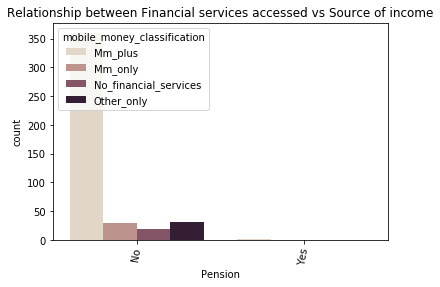

In [19]:
plt.title('Relationship between Financial services accessed vs Source of income')
sns.countplot(y = income['Source of income'] , hue=income['mobile_money_classification'],palette="ch:.25")  
plt.xticks(rotation=80)
plt.show()

plt.title('Relationship between Financial services accessed vs Source of income')
sns.countplot(income['Rental income'] , hue=income['mobile_money_classification'],palette="ch:.25") 
plt.xticks(rotation=80)
plt.show()

plt.title('Relationship between Financial services accessed vs Source of income')
sns.countplot(income['Pension'] , hue=income['mobile_money_classification'],palette="ch:.25")  
plt.xticks(rotation=80)
plt.show()

In [20]:
income['Rental income'].value_counts()

No     434
Yes      7
Name: Rental income, dtype: int64

- In the first graph that visualises individuals who earn a salary/wages the most evident thing i notice is that individuals who earn a salary either from Government or from a private company tend to use mobile money and also use at least one of the other financial services (savings, credit, insurance) more than any other financial service. While for entreprenuers and other individuals who  are employed by other people their use of financial services almost having the same count.

- Individuals who get their income from Rentals and Pension almost have the same graph with the only difference of 7 individuals who get income from rent use mobilemoney and other financial services 

## Relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

### Use if mobile services vs Age

In [21]:
purchases = dataset[['mobile_money','Age', 'Gender', 'Marital status','Land owner','Source of income','Rental income','Pension','Use mobile money for purchases',
                    'Use mobile money for paying your bills?']]

In [22]:
use = purchases.loc[purchases['mobile_money'] == 'Yes']
use

,mobile_money,Age,Gender,Marital status,Land owner,Source of income,Rental income,Pension,Use mobile money for purchases,Use mobile money for paying your bills?
1,Yes,40,Male,Married,Yes,Government,No,No,Monthly,Monthly
2,Yes,10,Female,Single,No,not applicable,No,No,Never,not applicable
3,Yes,50,Male,Married,Yes,not applicable,No,No,Monthly,not applicable
4,Yes,30,Male,Married,No,not applicable,No,No,Never,not applicable
6,Yes,30,Female,Married,No,not applicable,No,No,Never,not applicable
...,...,...,...,...,...,...,...,...,...,...
7085,Yes,30,Female,Divorced,No,not applicable,No,No,Never,Never
7086,Yes,20,Male,Married,No,not applicable,No,No,Daily,not applicable
7087,Yes,20,Male,Married,No,not applicable,No,No,Never,not applicable
7090,Yes,30,Male,Married,Yes,not applicable,No,No,Less often than monthly,not applicable


Text(0.5, 1, 'Relationship between often use of mobile money vs Age')

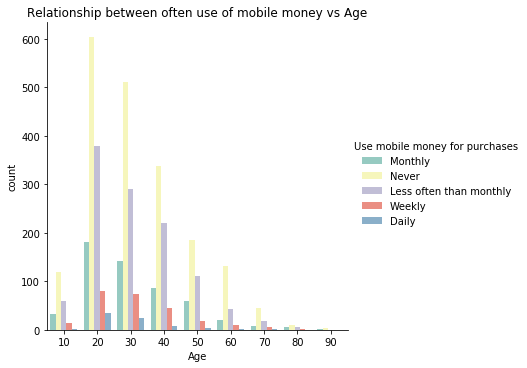

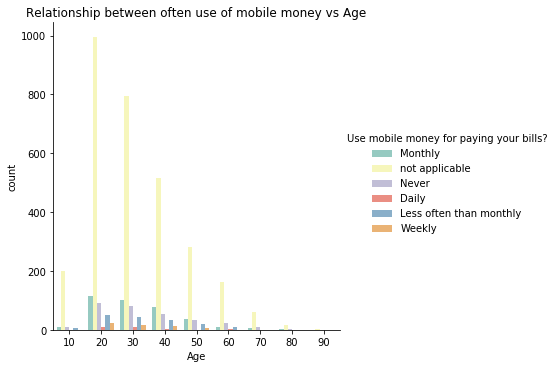

In [23]:
sns.catplot(x="Age", hue="Use mobile money for purchases", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Age')
sns.catplot(x="Age", hue="Use mobile money for paying your bills?", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Age')

In [24]:
use["Use mobile money for purchases"].value_counts()

Never                      1947
Less often than monthly    1124
Monthly                     537
Weekly                      246
Daily                        76
Name: Use mobile money for purchases, dtype: int64

In [25]:
use["Use mobile money for paying your bills?"].value_counts()

not applicable             3030
Monthly                     355
Never                       297
Less often than monthly     167
Weekly                       58
Daily                        23
Name: Use mobile money for paying your bills?, dtype: int64

- The shape of these graphs are the same, both stewed on the right.

- The Age graphs on on the often use of mobile services either for purchases or paying bills almost reflect the same with both graphs peaking at the age in intervals of 20 and declining tremendously after 50 years.

- What is also evident is that in both graphs individueals tend to use mobile services for payments and purchases monthly than anyother time count.

- 859 Tanzanians prefare to make pruchases using mobile money more than paying bills with the total count of those paying bills to 603

### Use if mobile services vs Gender

Text(0.5, 1, 'Relationship between often use of mobile money vs Gender')

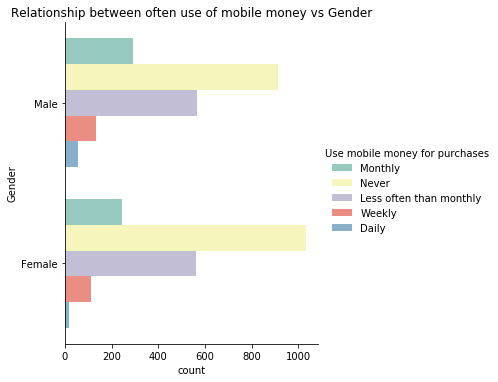

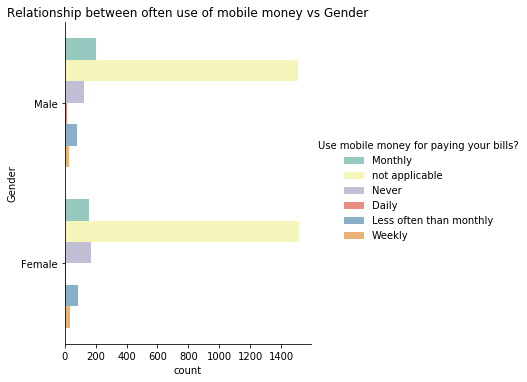

In [26]:
sns.catplot(y="Gender", hue="Use mobile money for purchases", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Gender')
sns.catplot(y="Gender", hue="Use mobile money for paying your bills?", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Gender')


- Intresting here we find that for making purchases both genders use mobile money less often than a month and both graphs are almost identical with only a small difference

- The use of mobile money for paying bills the graphs are almost identical with a small difference. Both Male and Female almost having the same count for monthly of mobile money service.

### Use if mobile services vs Marital Status

Text(0.5, 1, 'Relationship between often use of mobile money vs Marital Status')

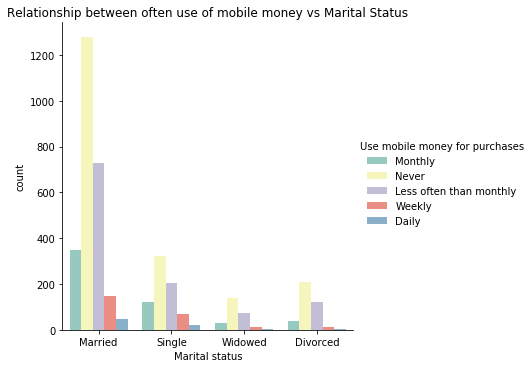

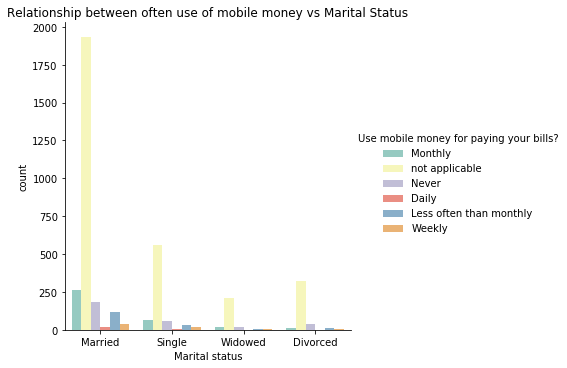

In [27]:
sns.catplot(x='Marital status', hue="Use mobile money for purchases", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Marital Status')
sns.catplot(x='Marital status', hue="Use mobile money for paying your bills?", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Marital Status')

- In making purchases Married and Single individuals have the highest plots. With Married individuals having the highest count in Monthly use and less than a month use of mobile money for purchases. With divorced and Widowed individuals having the highest plot in the less than monthly use for mobile money.

- In making bill payments we see for the first time Married individuals have the highest count in monthlyt use and that could indicate that these individuals more than the other individuals are more focused ion making the payments using mobile money. Single individuals would seems to be the 2nd individuals with the highest count in monthly use of mobile services.

## Use if mobile services vs Land owner 

Text(0.5, 1, 'Relationship between often use of mobile money vs Land ownership')

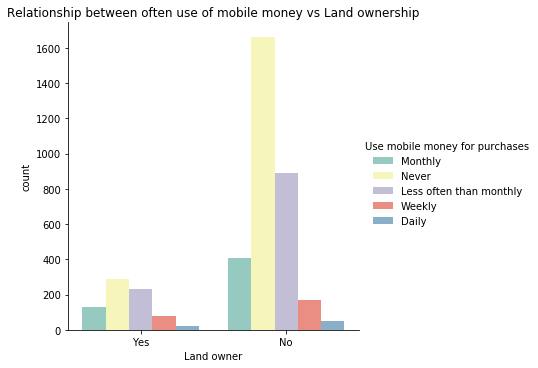

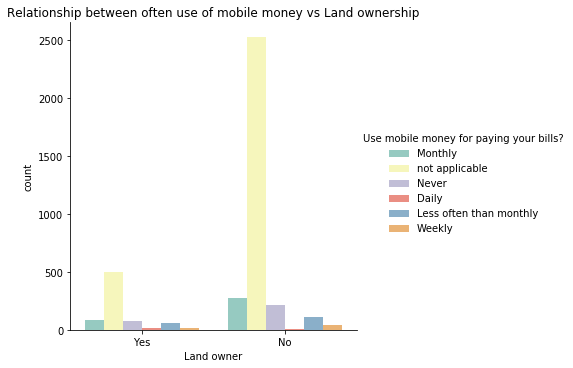

In [28]:
sns.catplot(x='Land owner', hue="Use mobile money for purchases", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Land ownership')

sns.catplot(x='Land owner', hue="Use mobile money for paying your bills?", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Land ownership')

- In making purchases in both individuals who either own land or don't prefare using mobile money service less often than monthly as compared to outher time intervals.

- In terms making bills individuals who don't own land use mobile money weekely more than those that own land.

### Use if mobile services vs Often use of mobile money 

#### Purchases 

Text(0.5, 1, 'Relationship between often use of mobile money vs Type of income')

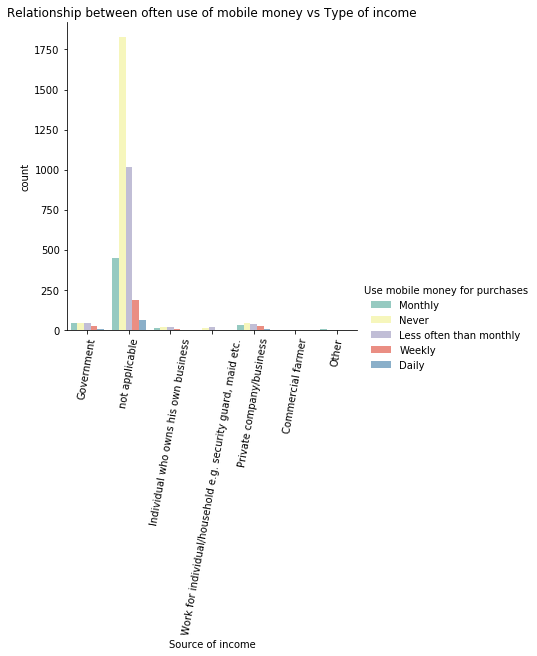

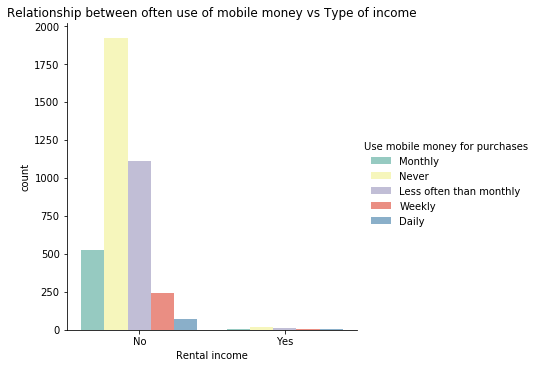

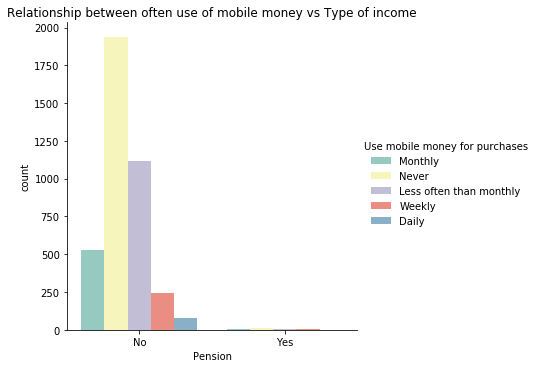

In [29]:
sns.catplot(x='Source of income', hue="Use mobile money for purchases", data=use, kind="count" ,palette="Set3")
plt.xticks(rotation=80)
plt.title('Relationship between often use of mobile money vs Type of income')

sns.catplot(x='Rental income', hue="Use mobile money for purchases", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Type of income')

sns.catplot(x='Pension', hue="Use mobile money for purchases", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Type of income')

Text(0.5, 1, 'Relationship between often use of mobile money vs Type of income')

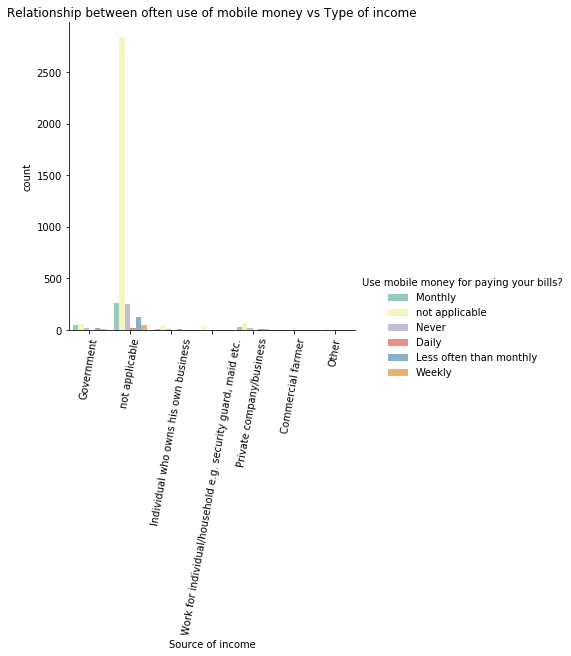

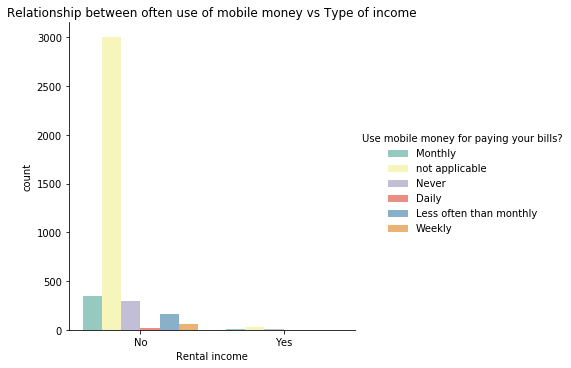

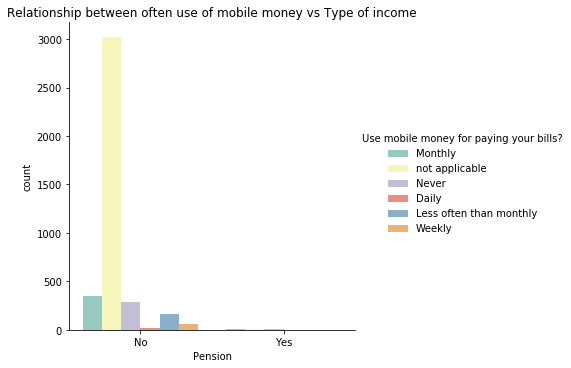

In [30]:
sns.catplot(x='Source of income', hue="Use mobile money for paying your bills?", data=use, kind="count" ,palette="Set3")
plt.xticks(rotation=80)
plt.title('Relationship between often use of mobile money vs Type of income')

sns.catplot(x='Rental income', hue="Use mobile money for paying your bills?", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Type of income')

sns.catplot(x='Pension', hue="Use mobile money for paying your bills?", data=use, kind="count" ,palette="Set3")
plt.title('Relationship between often use of mobile money vs Type of income')

- These graphs above are almost the same represantation of the graphs that shoe the relationship between types of income and different mobile money services with all the graphs almost being identical

- On the first graph Private and Government employees are use mobile money monlthy for purchases as compared to other, with entreprenuers and those employed by other individuals using mobile money less than a month

- With rental income and pension graphs we can't say much exept the fact that the graphs are almost same.Individuals who said Yes to eaning an income by rental and those that get a pension have little to no graphical representation. The individuals who answered no to eaning rental income or pension these individuals would often prefare to use mobile money for purhases less often than a month or to a month.

### Explore geographic distribution of mobile services coverage with respect to type of income.


In [31]:
geo_distribution = dataset.filter(['Source of income','Latitude', 'Longitude'])
geo_distribution

,Source of income,Latitude,Longitude
0,not applicable,-4.460442,29.811396
1,Government,-6.176438,39.244871
2,not applicable,-6.825702,37.652798
3,not applicable,-3.372049,35.808307
4,not applicable,-7.179645,31.039095
...,...,...,...
7089,not applicable,-5.811335,35.098103
7090,not applicable,-2.635156,32.945423
7091,not applicable,-8.303729,31.059642
7092,not applicable,-8.090712,35.836560


In [32]:
lat = -6.3728253 ; lon = 34.8924826
World_map = folium.Map(location=[lat, lon], zoom_start=6)


for lat, long, label in zip(geo_distribution.Latitude,geo_distribution.Longitude,'Rental income'):
    folium.CircleMarker([lat, long],radius = 10, color = 'red',parse_htmtl=False ).add_to(World_map)
World_map


for lat, long, label in zip(geo_distribution.Latitude,geo_distribution.Longitude,'Pension'):
    folium.CircleMarker([lat, long], radius = 5,color = 'green',parse_htmtl=False).add_to(World_map)
World_map


for lat, long, label in zip(geo_distribution.Latitude,geo_distribution.Longitude,'Money from trading/selling'):
    folium.CircleMarker([lat, long],radius = 5,color = 'orange',parse_htmtl=False).add_to(World_map)
World_map

for lat, long, label in zip(geo_distribution.Latitude,geo_distribution.Longitude,'Source of income'):
    folium.CircleMarker([lat, long],radius = 5,color = 'blue',parse_htmtl=False).add_to(World_map)
World_map

- Individuals who earn income through rent are located almostclose too border lines of Tanzania and are closely located with reserve parks, which might indicate that those place are good for property businesses

- Individuals with different source of income and entreprenuers are located pretty much all over the country which is expected.


### Conclusion 

- The use of financial services in Tanzania is dependent on alot of factors be it land owneership, marital status, source of income, age and where an individual gets their sorce of income.

- In almost every plot individuals who have said they never use mobile money services at all have a higher count in every plot. Maybe that is something that mobile financial services could look at and find ways to draw those individuals to start using their services

- Between the ages of 20 to 30 individuals use mobile money financial services more than any age interval.
- Individuals with a more stable source of income like those who work for Government and those in the privatesector use financial services and they use these services monthly. While looking at self employed individuals and those employed by other individuals who often use these service less than a month, that could be because of the times they get their income and depending on the stability of their employment.

- Married individuals compared to sinlge,divorced and widowed individuals tend to use these services more.

- Most individuals prefare using these mobile services for purchases more than paying their bills.